<a href="https://colab.research.google.com/github/eric-sun92/pytorch_nonlinear_classification/blob/main/02_pytorch_nonlinear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

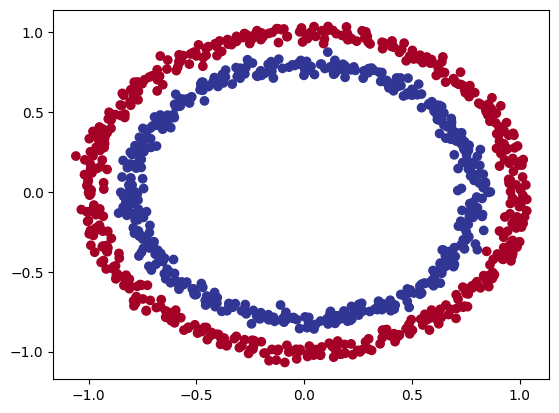

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
# convert to tensors and then train and test split

import torch 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

device = "cuda" if torch.cuda.is_available() else "cpu"

X_train = torch.from_numpy(X_train).type(torch.float).to(device)
X_test = torch.from_numpy(X_test).type(torch.float).to(device)
y_train = torch.from_numpy(y_train).type(torch.float).to(device)
y_test = torch.from_numpy(y_test).type(torch.float).to(device)

X_train.shape

torch.Size([800, 2])

In [8]:
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is non-linear activation function

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_3 = CircleModelV2().to(device)

In [9]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = correct / len(y_true) * 100
  return acc
  # compare how many and divide by len of y_true

In [21]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_3.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    y_logits_test = model_3(X_test).squeeze()
    y_preds_test = torch.round(torch.sigmoid(y_logits_test))
    
    test_loss = loss_fn(y_logits_test, y_test)
    test_acc = accuracy_fn(y_test, y_preds_test)

  if epoch % 100 == 0:
    print(f"loss: {loss}, acc: {acc} | testLoss: {test_loss}, testAcc: {test_acc}")


loss: 0.19577331840991974, acc: 100.0 | testLoss: 0.23090460896492004, testAcc: 99.5
loss: 1.0318307876586914, acc: 52.25 | testLoss: 1.0922839641571045, testAcc: 50.5
loss: 0.08756031095981598, acc: 100.0 | testLoss: 0.11960283666849136, testAcc: 100.0
loss: 0.06110474839806557, acc: 100.0 | testLoss: 0.08972154557704926, testAcc: 99.5
loss: 0.045863524079322815, acc: 100.0 | testLoss: 0.07138783484697342, testAcc: 99.5
loss: 0.03617415949702263, acc: 100.0 | testLoss: 0.05932360514998436, testAcc: 99.5
loss: 0.02967643365263939, acc: 100.0 | testLoss: 0.05082415044307709, testAcc: 100.0
loss: 0.02506549470126629, acc: 100.0 | testLoss: 0.04460711404681206, testAcc: 100.0
loss: 0.021647026762366295, acc: 100.0 | testLoss: 0.03995431214570999, testAcc: 100.0
loss: 0.019036054611206055, acc: 100.0 | testLoss: 0.03621470928192139, testAcc: 100.0


helper_functions already exists, skip downlaod


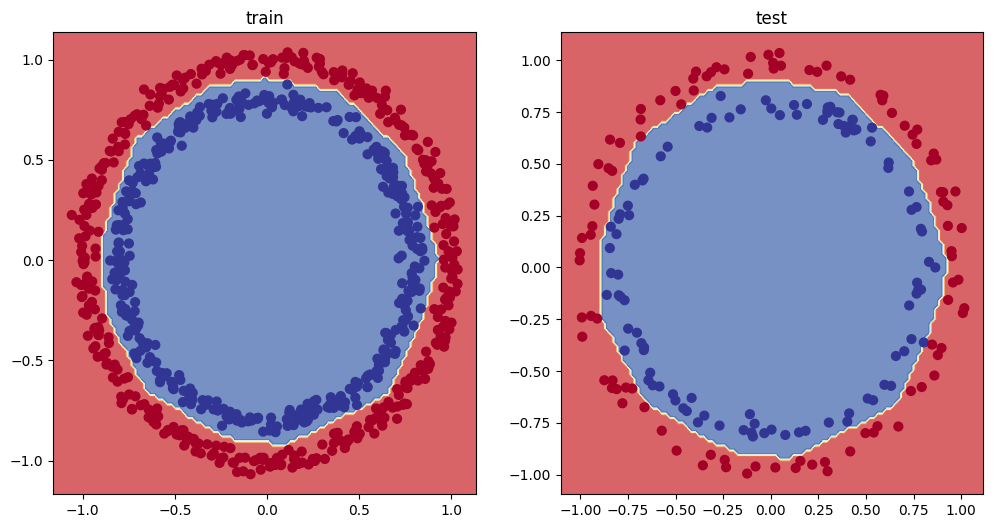

In [22]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions already exists, skip downlaod")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_3, X_test, y_test)



In [23]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

A = torch.arange(-10, 10, 1).type(torch.float)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

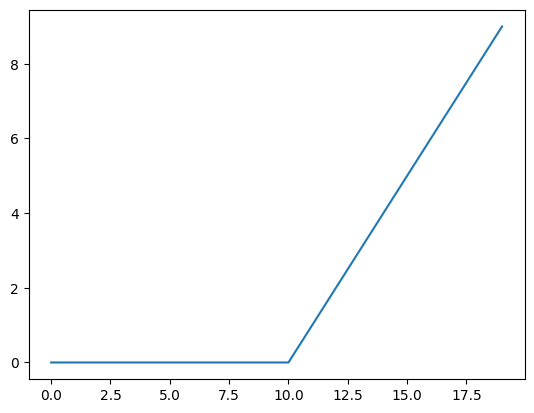

In [24]:
plt.plot(relu(A))

In [25]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

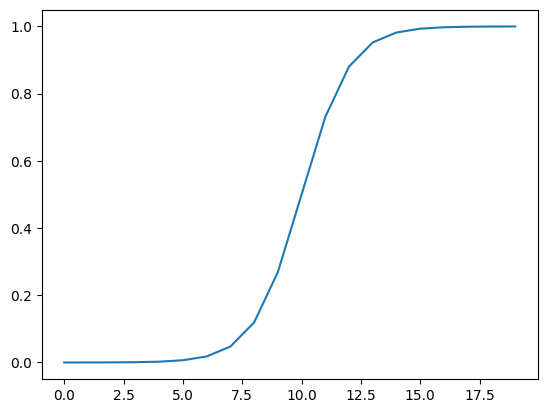

In [26]:
plt.plot(sigmoid(A))

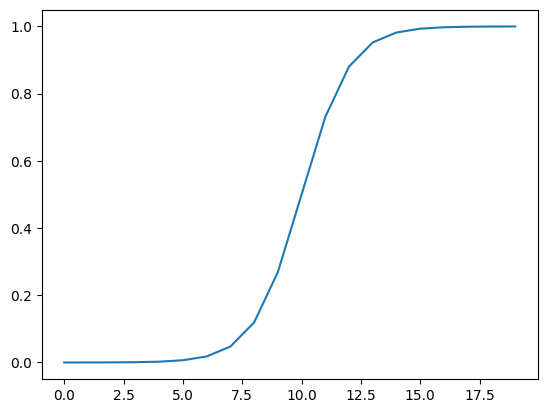

In [27]:
plt.plot(torch.sigmoid(A))